Overview: The dataset I chose for the Research Proposal is related to IBM Employee Attrition data. It is a fictional dataset created by data scientists at IBM. The dataset has 1470 obversations and 35 columns.The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Columns of Interest:
    Primary: Business Travel, Attrition, Monthly Income, Job Role
    Secondary: Job, Environment, Relationship, and Work Life Balance Satisfaction

Motivation / Purpose: By exploring the dataset, my hope is to determine a basis for a research proposal. After conducting exploratory analysis, the experiement will be described in detail below.

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
attrition = pd.read_csv('IBM_Attrition.csv')

In [4]:
#Get a feel for how large the dataset is
attrition.shape

(1470, 35)

In [5]:
#Get a feel for the actual data, show all columns
pd.options.display.max_columns = 50
attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
#Continue to understand the variables in the dataset
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


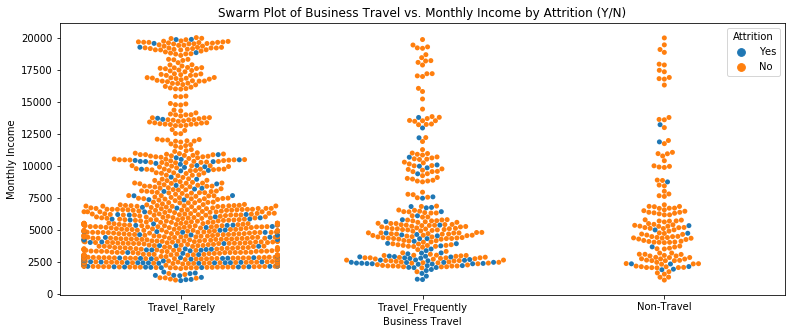

In [6]:
#Plot swarm plot showing business travel vs. monthly income by attrition

plt.figure(figsize=[13,5])
plt.title('Swarm Plot of Business Travel vs. Monthly Income by Attrition (Y/N)')
axis = sns.swarmplot(x="BusinessTravel", y="MonthlyIncome", hue="Attrition", data=attrition)
axis.set(xlabel='Business Travel', ylabel='Monthly Income')
plt.show()

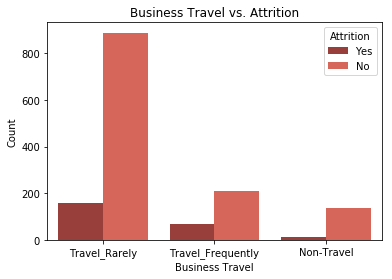

In [7]:
#Plot count plot showing business travel by attrition

axis = sns.countplot(x="BusinessTravel", hue='Attrition', data=attrition, palette="Reds_d")
axis.set(xlabel='Business Travel', ylabel='Count')
plt.title('Business Travel vs. Attrition')
plt.show()

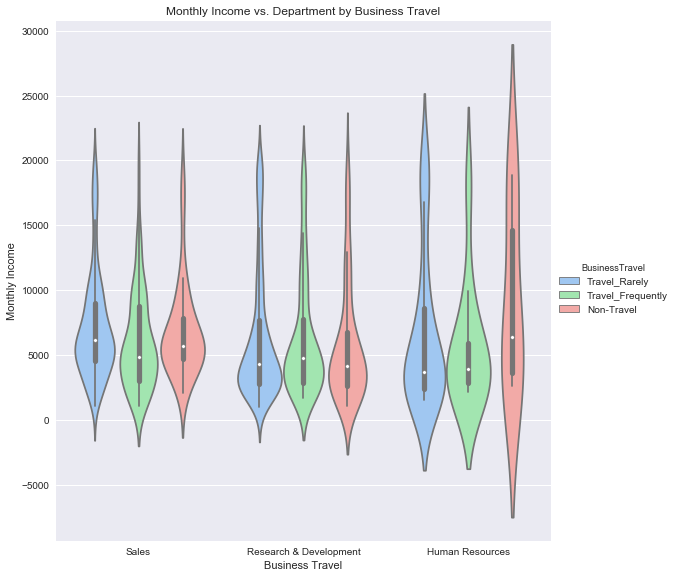

In [30]:
#Show Monthly Income by department by business travel

sns.set(style="darkgrid")
axis = sns.factorplot(x="Department", y="MonthlyIncome", hue='BusinessTravel',data=attrition,
                   size=8, kind="violin", palette="pastel", ci=95)
axis.despine(left=True)
axis.set_ylabels("Monthly Income")
axis.set_xlabels("Business Travel")
plt.title('Monthly Income vs. Department by Business Travel')
plt.xticks(rotation='horizontal')
plt.show()

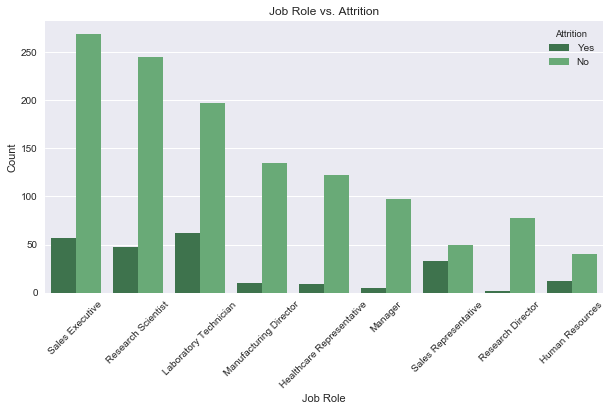

In [9]:
#Show job role vs. attrition
plt.figure(figsize=[10,5])
axis = sns.countplot(x="JobRole", hue='Attrition', data=attrition, palette="Greens_d")
axis.set(xlabel='Job Role', ylabel='Count')
plt.title('Job Role vs. Attrition')
plt.xticks(rotation=45)
plt.show()

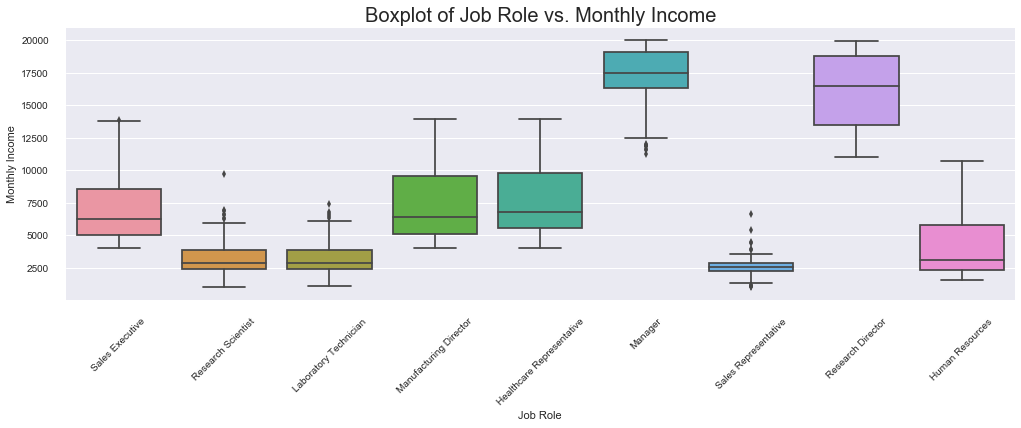

In [10]:
# Boxplot of monthly income by job role, want to specifically see how
#Sales representative fits in

plt.figure(figsize=[17,5])
ax = sns.boxplot(x='JobRole',y='MonthlyIncome', data=attrition)  
plt.title('Boxplot of Job Role vs. Monthly Income', fontsize=20)
sns.despine(offset=10, trim=True)
ax.set(xlabel='Job Role', ylabel='Monthly Income')
plt.xticks(rotation=45)
plt.show()

In [34]:
#Based on plots above, filter dataframe based on Job Role = 'Sales Representative'
attrition_findings = attrition[attrition['JobRole'] == 'Sales Representative']

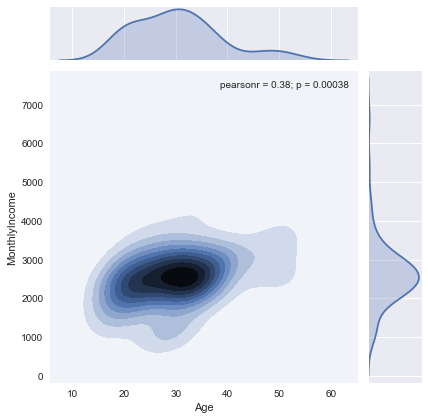

In [33]:
#Now look at age and income of this filtered group using a Kernel Density Estimation
#to understand the characteristics of this smaller group
sns.jointplot(x="Age", y="MonthlyIncome", data=attrition_findings, kind="kde")
plt.show()

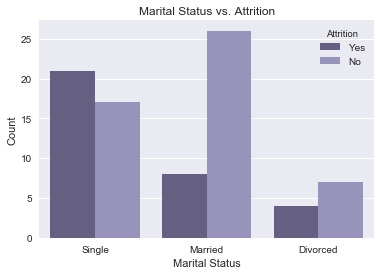

In [35]:
#Look at marital status by attrition
axis = sns.countplot(x="MaritalStatus", hue='Attrition', data=attrition_findings, palette="Purples_d")
axis.set(xlabel='Marital Status', ylabel='Count')
plt.title('Marital Status vs. Attrition')
plt.show()

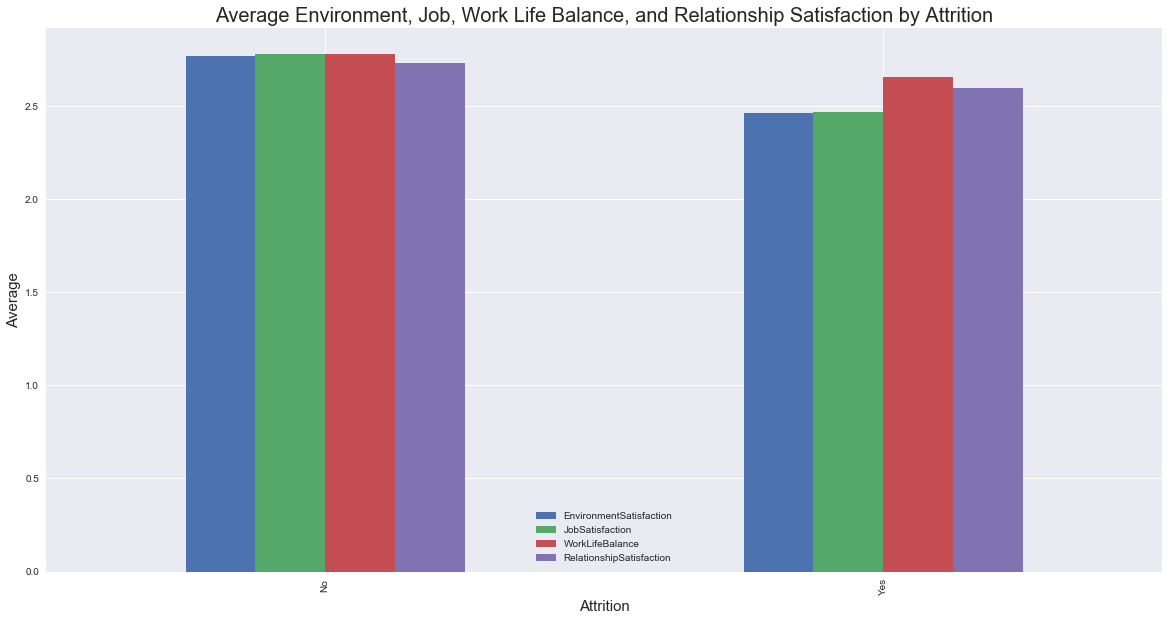

In [29]:
#Look at environment, job, work life balance, relationship satisfaction by attrition
attrition[['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction']].groupby('Attrition').mean().plot.bar(figsize=(20, 10))
plt.title('Average Environment, Job, Work Life Balance, and Relationship Satisfaction by Attrition', fontsize = 20)
plt.ylabel('Average', fontsize=15)
plt.xlabel('Attrition', fontsize=15)

plt.show()

Experiment Set Up

Two Versions: 
Control - Sales representatives with some sort of travel arrangement
Treatment - Random assignment of non-travel based assignment for Sales  Representatives.

Sample - Amongst those with Sales Representative job role, the treatment will be randomly applied to 10 employees and the control will be randomly chosen amongst those who will have an assignment that includes some form of travel.

Hypothesis:
The treatment population will experience lower overall numbers of attrition. Additionally, they will experience an increase in job, environment, relationship, and work life balance satisfaction.

Outcome:
Key Metric - Attrition

Other Measured Variables:
Secondary Metrics - job, environment, relationship, and work life balance satisfaction

___________________________________________________________________________________________________________________________________

Setting the Stage: Based on the my findings from the exploratory analysis above, it seems that attrition rates are higher for those employees who both travel frequently, and hold the job role of sales representative. IBM wants to uncover why attrition may be higher for these particular conditions and have asked their data science team to conduct an experiment to potentially causality. The experiment to be conducted will be randomly assigning non-travel based work assignments for 10 sales representatives over the next year.

Rollout Plan: The inidividuals selected for the treatment would be randomly chosen based on the end of their current assignment. The individuals in our control group will also be randomly selected, but only when their assignment includes some form of business travel. Based on this information, the rollout is classified as gradual. The intention is to "treat" 10 sales representatives with this new work assignment and the duration of the project should be 1 year from when it began. The reason for this gradual rollout is not only based on the fact that sales representatives have current ongoing obligations, but also due to the fact that if for some reason there are immediate negative consequences, the experiment can be paused or ended.

Evaluation Plan: 
Key Metric - For our key metric of attrition, we will evaluate success based on a p-value of .05 in regard to our two samples. To be clear, we will measure attrition of these two groups over the course of the year, from the time the randomly assigned, non-travel based work assignment occurred. We will refer to this average as attrition rate.

Secondary Metrics - For our secondary metrics, we will also measure based on a p-value of .05 in regard to our two samples. Toward the end of this assignment, our treatment and control groups will take an employee survey simliar to what spawned the experiment. We will compare the variables of job, environment, relationship, and work life balance satisfaction between the two groups.

Infrastructure Setup:
We will also ensure that the test is prepared by coordinating with HR and managers to ensure that the job assignments fall in line with the employees' areas of expertise. This will help ensure continuity and randomness of the experiment itself.